In [1]:
import pandas as pd
customers_data = pd.read_csv("Customers.csv")
transactions_data = pd.read_csv("Transactions.csv")
products_data = pd.read_csv('Products.csv')

C:\Users\abhishek\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
customers_data['Region'] = le.fit_transform(customers_data['Region'])
customers_data['ID'] = le.fit_transform(customers_data['CustomerID'])

In [3]:
data = pd.merge(transactions_data, customers_data, on="CustomerID", how="inner")

In [4]:
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ID
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,1,2022-12-03,198
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,0,2024-09-04,145
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,1,2024-04-04,126
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,3,2024-04-11,86
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,1,2022-03-15,69


C:\Users\abhishek\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Davies-Bouldin Index: 0.82


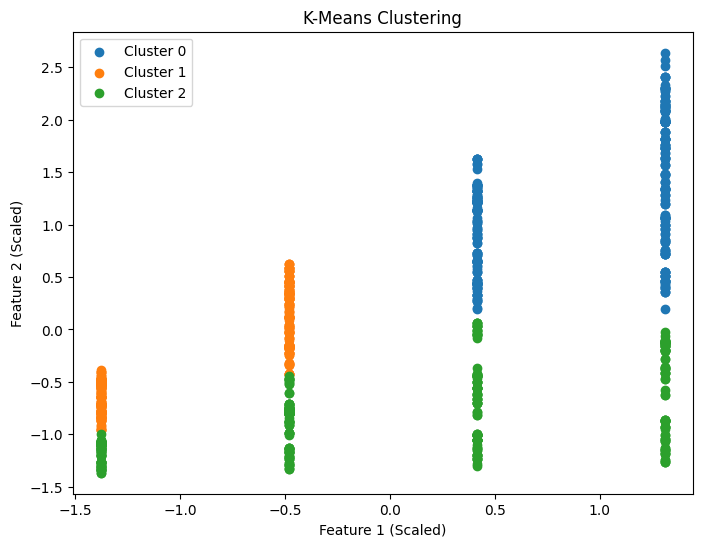

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

features = ["Quantity", "TotalValue", "Price"]
X = data[features]

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
n_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
data['Cluster'] = labels

# Evaluate using Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")

# Visualize clusters (if applicable for 2D/3D data)
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_data = X_scaled[labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster}")
plt.title("K-Means Clustering")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend()
plt.show()